# Import Data

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import random

In [66]:
data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/AceMejiaSanchez/Data/gaussian_small_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Kate/Data/uniform_small_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Fabiana/Data/uniform_large_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Ellee/Data/gaussian_large_d_1.tex")

# Creating NumPy array
array = np.array(data)

# Converting to Pandas DataFrame
df = pd.DataFrame(array)

# Look at data
df.head()


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,5.444140,3.835115,3.291091,5.501369,3.428899,4.922020,6.679717,4.207196,5.551717,4.834592,...,5.827100,5.536030,5.505949,3.871041,4.820020,6.893534,4.675085,6.774422,4.013287,1.0
1,4.751552,7.292662,5.983595,6.379493,5.236658,5.765614,5.973641,4.951007,4.739128,5.221459,...,6.917924,6.177616,3.985334,7.088912,6.713774,6.083684,3.632900,4.680444,3.866624,1.0
2,6.271994,6.196881,6.260575,5.059051,7.156964,5.242397,5.938668,6.792579,5.949605,4.961027,...,5.436174,5.076978,5.613830,4.757041,7.940103,5.800670,6.505194,5.033843,8.216384,0.0
3,4.175813,3.704364,3.481604,4.074979,4.708090,5.923180,3.811577,5.946279,5.894935,4.305289,...,3.936844,4.982322,5.583355,3.444634,5.448884,5.031922,5.339520,4.730453,5.299622,1.0
4,5.471645,5.372742,6.487397,5.160722,6.983509,5.484562,8.489674,6.386151,5.103722,6.382228,...,5.699915,4.489785,4.401668,5.614796,6.298538,6.293809,5.578622,6.118113,7.776001,0.0


# Convert 25/150 Columns into CONSECUTIVE Categorical Variables

In [69]:
# Converting 25 columns from numerical floats -> categorical integers
for i in range(25):
    
    df.iloc[:,i] = df.iloc[:,i].round() # Rounding
    df.iloc[:,i] = df.iloc[:,i].astype(int) # Integer
    df.iloc[:,i] = df.iloc[:,i].astype('category') # Categories
    
# Turn label into categorical label
df.iloc[:,150] = df.iloc[:,150].astype('category')

In [70]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,5.0,4.0,3.0,6.0,3.0,5.0,7.0,4.0,6.0,5.0,...,5.827100,5.536030,5.505949,3.871041,4.820020,6.893534,4.675085,6.774422,4.013287,1.0
1,5.0,7.0,6.0,6.0,5.0,6.0,6.0,5.0,5.0,5.0,...,6.917924,6.177616,3.985334,7.088912,6.713774,6.083684,3.632900,4.680444,3.866624,1.0
2,6.0,6.0,6.0,5.0,7.0,5.0,6.0,7.0,6.0,5.0,...,5.436174,5.076978,5.613830,4.757041,7.940103,5.800670,6.505194,5.033843,8.216384,0.0
3,4.0,4.0,3.0,4.0,5.0,6.0,4.0,6.0,6.0,4.0,...,3.936844,4.982322,5.583355,3.444634,5.448884,5.031922,5.339520,4.730453,5.299622,1.0
4,5.0,5.0,6.0,5.0,7.0,5.0,8.0,6.0,5.0,6.0,...,5.699915,4.489785,4.401668,5.614796,6.298538,6.293809,5.578622,6.118113,7.776001,0.0


# Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
# Split dataset into X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:150], df.iloc[:,-1], test_size=0.2, random_state=52)

# Visualization

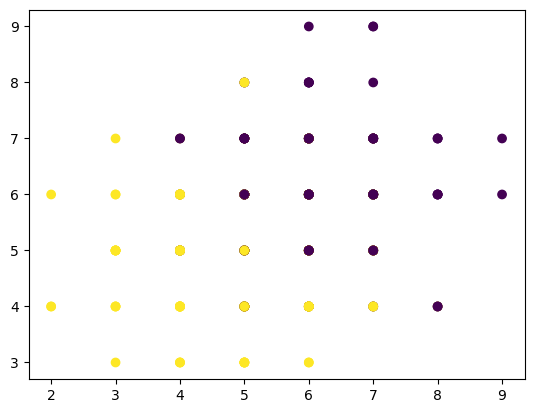

In [79]:
scatter = plt.scatter(X_train.iloc[:,6], X_train.iloc[:,7], c=y_train)

# XG-BOOST

In [81]:
# First, put this prompt: "conda install -c conda-forge py-xgboost" in anaconda to download xgboost package
# install xgboost in jupyter
!pip install xgboost

In [83]:
# import the classifier from the xgboost package
from xgboost import XGBClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Import scikit-learn dataset library
from sklearn import datasets

# read data
from sklearn.datasets import load_iris

# create model instance
# n_estimators: number of trees(estimators) the model uses --> the more used, the more accurate the model is
# max_depth: maximum depth of tree --> higher number makes model more complex, but too high can cause overfitting
# learning_rate: quantifies each tree's contribution to total prediction --> lower number takes longer, but can lead to better generalization
# objective: binary:logistic outputs probabilities. if classification is wanted, use binary:hinge
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', enable_categorical=True)

# fit model with the training data
bst.fit(X_train, y_train)

# make predictions for the test dataset
preds = bst.predict(X_test)

# print predictions
print(preds)

# print model F1-Score
print("Accuracy:",metrics.f1_score(y_test, preds))

[1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0]
Accuracy: 0.8


# SVM

In [85]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
# kernel: options for kernel include linear, poly, rbf, sigmoid
    # linear: use this when data can be split by a linear function
    # poly (polynomial): use this when data can be split by a polynomial function
    # rbf (radial basis function): use this when there are clusters of one class inside another
    # sigmoid: use this when the split between classes is curved and irregular
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print predictions
print(y_pred)

# print model F1-Score
print("Accuracy:",metrics.f1_score(y_test, y_pred))

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1.]
Accuracy: 1.0


# KNN

In [87]:
#import knn model
from sklearn.neighbors import KNeighborsClassifier

#create a knn classifier
#n_neighbors: predicting the label of the data point by looking at the 3 closest data points and getting them to "vote"
#algorithm: we may need to look at this if it misbehaves
neigh = KNeighborsClassifier(n_neighbors=5)

#train the model using the training sets
neigh.fit(X_train, y_train)

#predict the response for the test dataset
y_pred = neigh.predict(X_test)

#print predictions
print(y_pred)

# print model F1-Score
print("Accuracy:",metrics.f1_score(y_test,y_pred))

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1.]
Accuracy: 1.0


# FIC

In [89]:
class FeatureClassifier:
  def __init__(self,reqAcc = 0.01, classifier = 'DecisionTree', bias = [], control = None, n_jobs = None, random_state = None):
    self.featureClassifiers=[] #list of all the classifiers of all the selected features
    self.reqAcc=reqAcc #user specified cutoff value
    self.indexLs=[] # list of mapped index values to featureClassifiers
    self.flag=0
    self.bias=bias # list of biases for each and every label
    self.control=control #overfitting control for decision trees
    self.classifier=classifier #the classifier which is preferred by the user
    self.dic={'DecisionTree':0,'LinearRegression':1,'SVM':2,'LogisticRegression':3} #a dictionary which maps the classifier to its index
    self.n_jobs=n_jobs
    self.random_state=random_state
    self.num_lables = None

  def finIndex(self):
    #finds the index where the reqAcc condition fails and also created the indexLs[] for mapping
    for i in range(len(self.featureClassifiers)):
      if self.featureClassifiers[i][1] < self.reqAcc:
        return i
      self.indexLs.append(self.featureClassifiers[i][2])
    self.flag=1
    return i

  def fit(self,x,y):
    #applied the model to the dataset. The model is trained and saved for further prediction
    self.num_lables=len(set(y.flatten()))
    bestfeatures = SelectKBest(score_func=chi2,k=1)
    fit = bestfeatures.fit(x,y)

    for i in range(len(x[0])):
      clf=[DecisionTreeClassifier(max_depth=self.control,random_state=self.random_state),LinearRegression(n_jobs=self.n_jobs),SVC(gamma=self.control,random_state=self.random_state), LogisticRegression(penalty=self.control,random_state=self.random_state)][self.dic[self.classifier]]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=self.random_state)
      clf.fit(X_train[:,i:i+1],y_train)
      self.featureClassifiers.append((clf,fit.scores_[i],i))
    self.featureClassifiers.sort(key=lambda x:x[1],reverse=True)
    index=self.finIndex()
    if self.flag==0:
      self.featureClassifiers=self.featureClassifiers[:index]
    return

  def predict(self,x):
    #given a list of inputs, predicts the possible outputs
    if not self.bias:
      self.bias=np.zeros(self.num_lables)
    if len(self.bias)<self.num_lables:
      raise AttributeError('Please check the lenth of bias list')
    yPred=[]
    for i in range(len(x)):
      pred_arr=np.zeros(self.num_lables)
      for j in range(len(self.indexLs)):
        pred=np.round(self.featureClassifiers[j][0].predict([[x[i][self.indexLs[j]]]]))
        pred_arr[pred]+=self.featureClassifiers[j][1]+self.bias[pred[0]]
      yPred.append(np.argmax(pred_arr))
    return yPred

# F1-SCORES

In [91]:
# Assuming FeatureClassifier is correctly implemented for DecisionTreeClassifier
clf1 = FeatureClassifier(0, classifier='DecisionTree', control=3, random_state = 52)

# Fit model with the training data
clf1.fit(np.array(X_train), np.array(y_train).astype(int))

# Predict the response for the test dataset
y_pred = clf1.predict(np.array(X_test))

# Calculate and print F1 score
f1 = metrics.f1_score(np.array(y_test).astype(int), y_pred)
print("F1 Score:", f1)

# Print other relevant outputs for debugging
print(clf1.indexLs)

F1 Score: 1.0
[137, 103, 14, 13, 100, 140, 104, 110, 130, 0, 113, 95, 5, 15, 59, 94, 138, 48, 135, 30, 121, 43, 55, 123, 66, 122, 65, 125, 128, 132, 2, 68, 124, 149, 131, 146, 60, 112, 144, 58, 1, 145, 134, 53, 127, 44, 24, 39, 3, 25, 118, 40, 49, 26, 129, 46, 21, 114, 76, 107, 111, 61, 91, 105, 36, 120, 32, 78, 63, 84, 90, 67, 143, 108, 115, 57, 20, 6, 42, 74, 89, 77, 139, 87, 38, 97, 8, 52, 29, 45, 70, 19, 109, 81, 22, 34, 101, 7, 31, 98, 12, 72, 69, 23, 51, 62, 119, 18, 142, 37, 64, 99, 106, 28, 27, 80, 93, 75, 126, 116, 54, 86, 9, 79, 35, 85, 33, 82, 83, 141, 47, 41, 96, 102, 4, 133, 11, 17, 50, 71, 10, 136, 148, 92, 117, 88, 16, 56, 147, 73]
